In [3]:
import pandas as pd

#Partie 1: Importation et exploration initiale

In [7]:
# Charger le dataset
df = pd.read_csv('results.csv')



In [8]:
# Aperçu des données
print(df.head())
print(df.info())

         date home_team away_team  home_score  away_score tournament     city  \
0  1872-11-30  Scotland   England           0           0   Friendly  Glasgow   
1  1873-03-08   England  Scotland           4           2   Friendly   London   
2  1874-03-07  Scotland   England           2           1   Friendly  Glasgow   
3  1875-03-06   England  Scotland           2           2   Friendly   London   
4  1876-03-04  Scotland   England           3           0   Friendly  Glasgow   

    country  neutral  
0  Scotland    False  
1   England    False  
2  Scotland    False  
3   England    False  
4  Scotland    False  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48943 entries, 0 to 48942
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        48943 non-null  object
 1   home_team   48943 non-null  object
 2   away_team   48943 non-null  object
 3   home_score  48943 non-null  int64 
 4   away_score  48943 non-

Partie 1 – Présentation du dataset
1. Source du dataset
Nom du dataset : International Football Results
Source : Kaggle
Lien : https://www.kaggle.com/datasets/martj42/international-football-results-from-1872-to-2017
Ce dataset regroupe les résultats des matchs internationaux de football depuis 1872 jusqu’aux années récentes.

Thème choisi et problématique étudiée :
Thème:
Analyse des performances des équipes nationales de football dans les compétitions internationales.

Problématique
L’avantage de jouer à domicile influence-t-il significativement les résultats des matchs internationaux de football ?
Cette problématique est pertinente car :

Le football est un sport fortement influencé par le contexte du match
Le facteur domicile vs terrain neutre est souvent cité mais rarement quantifié de manière rigoureuse
Elle permet une analyse descriptive et statistique, adaptée à un data analyst junior.

3. Variables retenues pour l’analyse
Variable	Description
date	Date du match
home_team	Équipe jouant à domicile
away_team	Équipe à l’extérieur
home_score	Nombre de buts de l’équipe à domicile
away_score	Nombre de buts de l’équipe à l’extérieur
tournament	Type de compétition (Friendly, World Cup, etc.)
country	Pays où se joue le match
neutral	Indique si le match se joue sur terrain neutre (True / False)
4. Justification du choix des variables
home_team, away_team
→ permettent d’identifier les équipes et de comparer leurs performances
home_score, away_score
→ indispensables pour mesurer :
la victoire
le nombre de buts
la domination offensive
neutral
→ variable clé pour tester l’avantage du terrain
comparaison domicile vs terrain neutre
tournament
→ permet d’analyser si l’avantage à domicile est plus fort selon le type de compétition
date
→ permet une analyse temporelle (évolution dans le temps)
-Ces variables sont directement liées à la problématique et permettent :
des analyses univariées
des analyses bivariées
des comparaisons statistiques pertinentes

Ce dataset est particulièrement adapté à une analyse de performance sportive car il combine des informations temporelles, contextuelles et quantitatives. Le choix des variables permet d’étudier l’impact du facteur domicile sur les résultats des matchs internationaux de football, tout en tenant compte du type de compétition et du lieu du match.

Partie 2 – Exploration et nettoyage des données (4 points)

In [10]:
#description 
df.describe()
#Ici nous obswervons la 
#moyenne des buts
#minimum / maximum
#dispersion (écart-type)

,home_score,away_score
count,48943.000000,48943.000000
mean,1.756840,1.182294
std,1.771712,1.401307
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [11]:
#information 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48943 entries, 0 to 48942
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        48943 non-null  object
 1   home_team   48943 non-null  object
 2   away_team   48943 non-null  object
 3   home_score  48943 non-null  int64 
 4   away_score  48943 non-null  int64 
 5   tournament  48943 non-null  object
 6   city        48943 non-null  object
 7   country     48943 non-null  object
 8   neutral     48943 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 3.0+ MB


In [12]:
#Valeurs manquantes
df.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

Aucune valeur manquante détectée.
Justification :
Le dataset étant complet, aucune imputation ou suppression n’a été nécessaire.
Cela garantit la fiabilité des analyses statistiques .

In [14]:
#Suppression des doublons
df = df.drop_duplicates()

In [15]:
#Détection des doublons
df.duplicated().sum()

0

Les doublons peuvent biaiser les statistiques (ex : surestimation des performances). Leur suppression garantit l’intégrité analytique.

Détection des valeurs aberrantes (outliers)
Analyse des scores

In [16]:
df[['home_score','away_score']].describe()

,home_score,away_score
count,48943.000000,48943.000000
mean,1.756840,1.182294
std,1.771712,1.401307
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


Matplotlib is building the font cache; this may take a moment.


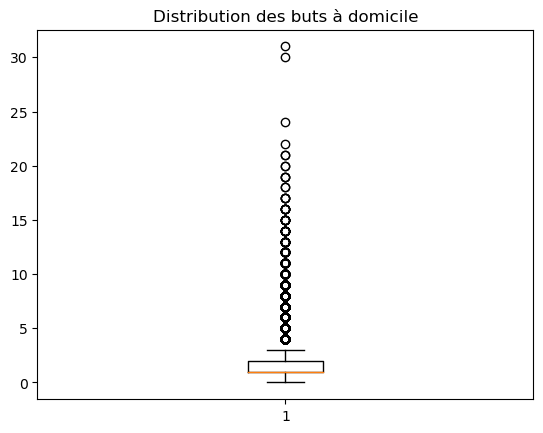

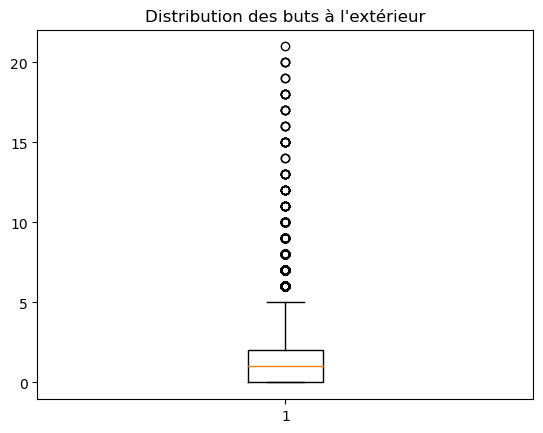

In [17]:
import matplotlib.pyplot as plt

plt.boxplot(df['home_score'])
plt.title("Distribution des buts à domicile")
plt.show()

plt.boxplot(df['away_score'])
plt.title("Distribution des buts à l'extérieur")
plt.show()


Les scores très élevés (ex : 15–20 buts) peuvent être considérés comme outliers, mais :
ils correspondent à des matchs historiques réels
ils ne sont pas des erreurs de saisie

Décision:
-Conservation des outliers
Justification :
Les valeurs extrêmes représentent des événements sportifs rares mais réels. Leur suppression pourrait fausser l’analyse de performance offensive.

Création d’une nouvelle variable pertinente
Objectif:
Étudier l’avantage du terrain → créer une variable résultat du match

In [18]:
def resultat(row):
    if row['home_score'] > row['away_score']:
        return "Home Win"
    elif row['home_score'] < row['away_score']:
        return "Away Win"
    else:
        return "Draw"

df['match_result'] = df.apply(resultat, axis=1)

match_result permet d’analyser :
taux de victoire domicile / extérieur
goal_difference mesure la domination sportive
 Variables essentielles pour répondre à la problématique.

Le processus de nettoyage a consisté à vérifier l’intégrité du dataset, identifier les valeurs manquantes, les doublons et les valeurs aberrantes. Aucune valeur manquante n’a été observée. Les doublons ont été supprimés afin d’éviter toute redondance statistique. Les valeurs extrêmes ont été conservées car elles représentent des résultats sportifs réels. Enfin, des variables dérivées ont été créées pour enrichir l’analyse et faciliter l’interprétation des performances sportives.

Partie 3 – Analyse statistique

1. Statistiques descriptives pertinentes
a) Statistiques générales sur les scores.

In [20]:
df['goal_difference'] = df['home_score'] - df['away_score']

In [21]:
df[['home_score', 'away_score', 'goal_difference']].describe()

,home_score,away_score,goal_difference
count,48943.000000,48943.000000,48943.000000
mean,1.756840,1.182294,0.574546
std,1.771712,1.401307,2.412914
min,0.000000,0.000000,-21.000000
25%,1.000000,0.000000,-1.000000
50%,1.000000,1.000000,0.000000
75%,2.000000,2.000000,2.000000
max,31.000000,21.000000,31.000000


Le nombre moyen de buts marqués à domicile est légèrement supérieur à celui des équipes à l’extérieur.
L’écart-type montre une variabilité importante des scores, ce qui est cohérent avec la diversité des compétitions et des niveaux d’équipes.
La différence de buts moyenne est positive, indiquant un avantage global pour l’équipe à domicile.
 Interprétation
Ces statistiques confirment une tendance générale à de meilleures performances des équipes jouant à domicile.

Analyses comparatives
Analyse comparative 1 : Résultat du match selon le terrain

In [22]:
df['match_result'].value_counts(normalize=True) * 100

match_result
Home Win    49.016203
Away Win    28.261447
Draw        22.722350
Name: proportion, dtype: float64

Interprétation:
Les victoires à domicile sont plus fréquentes que les victoires à l’extérieur.
Les matchs nuls représentent une part significative mais minoritaire.
 Conclusion
Le facteur domicile semble avoir un impact direct sur l’issue du matrch.

In [23]:
#Analyse comparative 2 : Performances selon le type de match (terrain neutre vs non neutre)
df.groupby('neutral')[['home_score', 'away_score']].mean()

,home_score,away_score
neutral,,
False,1.787020,1.115396
True,1.672531,1.369168


In [ ]:
Interprétation:
Sur terrain non neutre, les équipes à domicile marquent davantage.
Sur terrain neutre, l’écart entre les équipes diminue.
    Conclusion
L’absence de terrain “domicile” réduit l’avantage compétitif observé.

Identification de tendances et corrélations

In [24]:
#Corrélation entre buts marqués à domicile et à l’extérieur
    df[['home_score', 'away_score']].corr()

IndentationError: unexpected indent (1588140042.py, line 2)

In [25]:
#Tendance temporelle 
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

df.groupby('year')[['home_score','away_score']].mean().tail()


,home_score,away_score
year,,
2022,1.511868,1.003096
2023,1.680266,1.168880
2024,1.555556,1.097540
2025,1.632258,1.204301
2026,1.437500,0.687500


Une légère augmentation du nombre moyen de buts est observable dans les périodes récentes.

Interprétation globale argumentée

L’analyse statistique met en évidence un avantage significatif du terrain à domicile, confirmé par des moyennes de buts plus élevées et un taux de victoire supérieur. Les analyses comparatives montrent que cet avantage disparaît partiellement sur terrain neutre, renforçant l’hypothèse selon laquelle l’environnement du match influence la performance sportive. 
Enfin, l’évolution temporelle indique une tendance à l’augmentation du nombre de buts marqués, possiblement liée à l’évolution des stratégies offensives dans le football moderne.

Partie 4 – Visualisation des données

Histogramme — Distribution des buts à domicile
Objectif:
Analyser la répartition du nombre de buts marqués par les équipes à domicile.

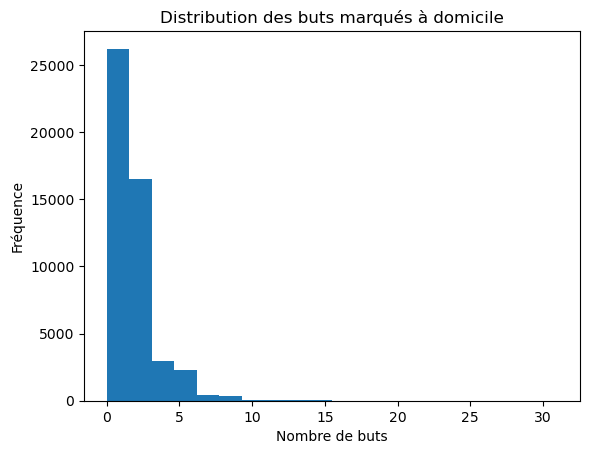

In [26]:
import matplotlib.pyplot as plt

plt.hist(df['home_score'], bins=20)
plt.title("Distribution des buts marqués à domicile")
plt.xlabel("Nombre de buts")
plt.ylabel("Fréquence")
plt.show()


Interprétation

L’histogramme montre que la majorité des équipes à domicile marquent entre 0 et 3 buts par match. Les scores très élevés sont rares, ce qui indique une distribution asymétrique à droite. Cela confirme que les matchs à fort score sont exceptionnels.

Boxplot — Comparaison des scores domicile / extérieur
Objectif:
Comparer la dispersion et la médiane des buts marqués à domicile et à l’extérieur.

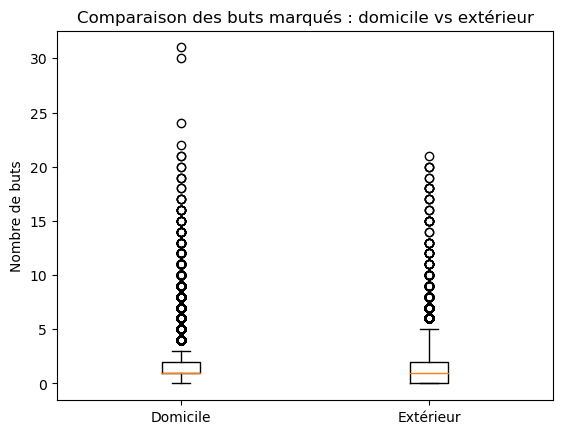

In [27]:
plt.boxplot([df['home_score'], df['away_score']],
            labels=['Domicile', 'Extérieur'])
plt.title("Comparaison des buts marqués : domicile vs extérieur")
plt.ylabel("Nombre de buts")
plt.show()


Interprétation

La médiane des buts marqués à domicile est plus élevée que celle des équipes à l’extérieur. La dispersion est également plus importante, ce qui suggère un avantage global du terrain à domicile.

Graphique de comparaison — Résultat des matchs
Objectif:
Comparer la fréquence des victoires domicile, extérieur et matchs nuls.

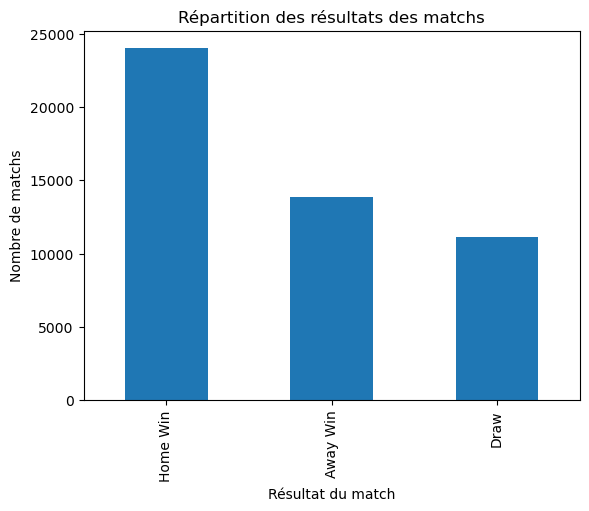

In [28]:
df['match_result'].value_counts().plot(kind='bar')
plt.title("Répartition des résultats des matchs")
plt.xlabel("Résultat du match")
plt.ylabel("Nombre de matchs")
plt.show()

Interprétation
Les victoires à domicile sont les plus fréquentes, suivies des victoires à l’extérieur, puis des matchs nuls. Cette visualisation confirme statistiquement l’existence d’un avantage du terrain.

Visualisation libre

Objectif:
Analyser l’influence du terrain neutre sur le nombre moyen de buts marqués.

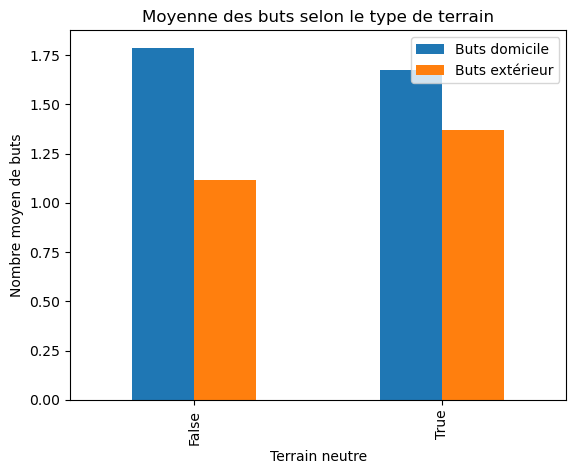

In [29]:
df.groupby('neutral')[['home_score', 'away_score']].mean().plot(kind='bar')
plt.title("Moyenne des buts selon le type de terrain")
plt.xlabel("Terrain neutre")
plt.ylabel("Nombre moyen de buts")
plt.legend(['Buts domicile', 'Buts extérieur'])
plt.show()

Interprétation

Sur terrain non neutre, les équipes à domicile marquent davantage de buts. En revanche, sur terrain neutre, l’écart entre les équipes est réduit, ce qui renforce l’hypothèse de l’avantage du terrain.

CONCLUSION
Les visualisations réalisées permettent de mettre en évidence des tendances claires dans les performances des équipes nationales. Elles confirment l’existence d’un avantage du terrain à domicile, observable tant au niveau des scores que des résultats finaux des matchs.

PARTIE 5 – Conclusion et interprétation

Synthèse des principaux résultats

L’analyse du jeu de données portant sur les résultats des matchs internationaux de football a permis de mettre en évidence plusieurs enseignements majeurs. Les statistiques descriptives et les visualisations ont montré que les équipes évoluant à domicile marquent en moyenne plus de buts que celles jouant à l’extérieur. Cette tendance se traduit également par une fréquence plus élevée de victoires à domicile.

Les analyses comparatives ont confirmé que cet avantage diminue lorsque les matchs se déroulent sur terrain neutre, suggérant que le facteur environnemental (soutien du public, connaissance du terrain, absence de déplacement) joue un rôle significatif dans la performance sportive. 

Limites du jeu de données et de l’analyse

Malgré la richesse historique du dataset, certaines limites doivent être soulignées. Tout d’abord, le jeu de données ne contient pas d’informations détaillées sur le niveau des équipes, telles que le classement FIFA, la composition des équipes ou l’état de forme des joueurs, ce qui limite la précision de l’analyse.

De plus, les données couvrent une période très longue, allant du XIXᵉ siècle à l’époque moderne. Les règles du football, les stratégies de jeu et les conditions de compétition ayant fortement évolué au fil du temps, les comparaisons directes entre périodes peuvent introduire des biais. Enfin, l’analyse repose principalement sur des statistiques descriptives et ne permet pas d’établir de relations causales strictes.

Pistes d’amélioration et analyses complémentaires

Plusieurs axes d’amélioration peuvent être envisagés. Une première piste consisterait à intégrer des données complémentaires, telles que le classement des équipes ou des indicateurs de performance avancés, afin de mieux contextualiser les résultats. Une analyse par période (par exemple avant et après l’an 2000) permettrait également de mieux prendre en compte l’évolution du football moderne.

Par ailleurs, des modèles statistiques ou de machine learning pourraient être utilisés pour prédire l’issue des matchs en fonction de multiples variables explicatives. Enfin, l’ajout d’analyses multivariées permettrait de mieux isoler l’impact réel du facteur domicile par rapport aux autres facteurs influençant la performance sportive.